In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def read_params(fname):
    params = {}
    with open(fname) as f:
        for line in f:
            (key, val) = line.split()
            try:
                params[key] = float(val)
            except:
                params[key] = val
    return params

In [3]:
def read_stars(fname):
    with open(fname) as f:
        nstars = np.fromfile(f, dtype=np.int32, count=1)[0]
        rectangular = np.fromfile(f, dtype=np.int32, count=1)[0]
        corner = np.fromfile(f, dtype=np.float32, count=2)
        theta_e = np.fromfile(f, dtype=np.float32, count=1)[0]
        stars = np.fromfile(f, dtype=np.float32)
        stars = stars.reshape(nstars, 3)
    return stars

In [4]:
def read_map(fname):
    with open(fname) as f:
        nrows, ncols = np.fromfile(f, dtype=np.int32, count=2)
        dat = np.fromfile(f, dtype=np.int32)
        dat = dat.reshape(nrows,ncols)
    return dat

In [5]:
def read_hist(fname):
    return np.loadtxt(fname, dtype=np.int32)

In [6]:
params = read_params(f'irs_parameter_info.txt')
params

{'kappa_tot': 0.400000006,
 'shear': 0.400000006,
 'mu_ave': 5.0,
 'smooth_fraction': 0.0,
 'kappa_star': 0.400000006,
 'kappa_star_actual': 0.400000066,
 'theta_e': 1.0,
 'random_seed': 1.0,
 'mass_function': 'equal',
 'm_lower': 1.0,
 'm_upper': 1.0,
 'mean_mass': 1.0,
 'mean_mass2': 1.0,
 'm_lower_actual': 1.0,
 'm_upper_actual': 1.0,
 'mean_mass_actual': 1.0,
 'mean_mass2_actual': 1.0,
 'light_loss': 0.00999999978,
 'num_stars': 19154.0,
 'rad': 218.826401,
 'safety_scale': 1.37,
 'center_y1': 0.0,
 'center_y2': 0.0,
 'half_length_source': 25.0,
 'num_pixels': 10000.0,
 'mean_rays_per_pixel': 10000.0,
 'half_length_image_x1': 32.9721642,
 'half_length_image_x2': 157.533676,
 'ray_sep': 0.000111803405,
 't_ray_shoot': 29.828}

In [7]:
stars = read_stars(f'irs_stars.bin')

(19154, 3)


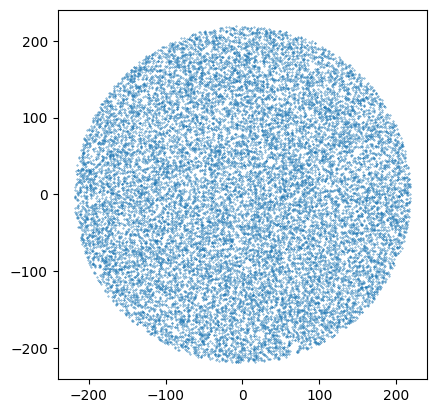

In [8]:
print(stars.shape)
fig, ax = plt.subplots()
ax.scatter(stars[:, 0], stars[:, 1], s=0.1)
ax.set_aspect(1)
plt.show()

In [9]:
rays = read_map(f'irs_magnifications.bin')
# magnification
mu = rays / params['mean_rays_per_pixel'] * np.abs(params['mu_ave'])
print(np.min(rays))
print(np.max(rays))
print(np.mean(rays))
# astronomical magnitudes
mags = -2.5*np.log10(mu / np.abs(params['mu_ave']))
print(np.min(mags))
print(np.max(mags))

2587
352612
9714.20999538
-3.868242720029522
1.4680089282086415


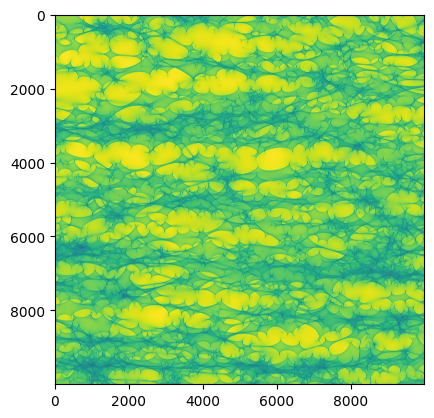

In [10]:
fix, ax = plt.subplots()
ax.imshow(mags)
ax.set_aspect(1)
plt.show()

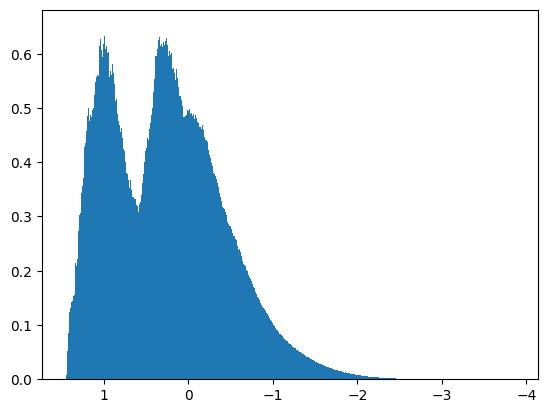

In [11]:
# num rays, num pixels
num_rays, num_pixels = read_hist(f'irs_numrays_numpixels.txt').T
# magnification
mu = num_rays / params['mean_rays_per_pixel'] * np.abs(params['mu_ave'])
# astronomical magnitudes
mags = -2.5*np.log10(mu / np.abs(params['mu_ave']))

fig, ax = plt.subplots()
ax.hist(mags, weights=num_pixels, density=True, bins = 1000)
ax.invert_xaxis()
plt.show()